In [1]:
# imports
import matplotlib.pyplot as plt
import matplotlib
# import joblib
import cv2
import os
import torch 
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import random
import math
import sys
sys.path.append('../../')

#import pretrainedmodels
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

from resnet import *
from train import train, test
from dataset import *
from batchnorm import BatchNorm, CustomBatchNorm2d

In [2]:
# !pip install pretrainedmodels

In [3]:
#device = torch.device("cpu")
device = torch.device("cuda")
dtype = torch.float

BATCH_SIZE = 64

In [4]:
image_paths = list(paths.list_images('../../data/101_ObjectCategories'))
data = []
labels = []
for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    if label == 'BACKGROUND_Google':
        continue
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    data.append(image)
    labels.append(label)
data = np.array(data)
labels = np.array(labels)

/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


In [5]:
len(set(labels))

101

In [6]:
# one hot encode
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(f"Total number of classes: {len(lb.classes_)}")


Total number of classes: 101


In [7]:
# divide the data into train, validation, and test set
(x_train, x_val , y_train, y_val) = train_test_split(data, labels, 
                                                    test_size=0.3,  
                                                    stratify=labels,
                                                    random_state=42)

(x_val, x_test, y_val, y_test) = train_test_split(x_val, y_val, 
                                                    test_size=0.65, 
                                                    random_state=42)
print(f"x_train examples: {x_train.shape}\nx_test examples: {x_test.shape}\nx_val examples: {x_val.shape}")

x_train examples: (6073,)
x_test examples: (1693,)
x_val examples: (911,)


In [8]:
np.argmax(y_val[:20], axis=-1)

array([98,  3, 65, 52,  0,  1, 71, 72,  3,  3, 23,  3,  1, 55,  1, 11, 17,
       40, 90, 53])

In [9]:
train_data = ImageDataset(x_train, y_train, train_transform)
val_data = ImageDataset(x_val, y_val, val_transform)
test_data = ImageDataset(x_test, y_test, val_transform)

# dataloaders
trainloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
valloader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)
testloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [10]:
# model.eval()

In [11]:
# resnet18
# model = resnet18(pretrained=False, norm_layer=BatchNorm).to(device)

In [12]:
# print('customized batchnorm test')
# print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
# model = resnet18(pretrained=False, norm_layer=BatchNorm).to(device)
# train(model, trainloader, valloader)
# correct, total = test(model, testloader)
# print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

customized batchnorm test
Training on 6073 examples, validating on 911 examples...
norm layer <class 'batchnorm.CustomBatchNorm2d'>
dilation [False, False, False]
stride 1
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)
Epoch 1 of 32


/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


train loss 0.0583 val loss 0.0582 train acc 22.84 val acc 27.00 lr 0.0010
Epoch 2 of 32
train loss 0.0510 val loss 0.0614 train acc 28.01 val acc 25.69 lr 0.0010
Epoch 3 of 32
train loss 0.0473 val loss 0.0553 train acc 32.57 val acc 30.19 lr 0.0010
Epoch 4 of 32
train loss 0.0438 val loss 0.0678 train acc 36.67 val acc 28.65 lr 0.0010
Epoch 5 of 32
train loss 0.0409 val loss 0.0448 train acc 40.03 val acc 39.30 lr 0.0010
Epoch 6 of 32
train loss 0.0376 val loss 0.0396 train acc 44.13 val acc 44.02 lr 0.0010
Epoch 7 of 32
train loss 0.0347 val loss 0.0408 train acc 47.54 val acc 43.80 lr 0.0010
Epoch 8 of 32
train loss 0.0317 val loss 0.0371 train acc 51.08 val acc 48.30 lr 0.0010
Epoch 9 of 32
train loss 0.0290 val loss 0.0332 train acc 54.59 val acc 51.92 lr 0.0010
Epoch 10 of 32
train loss 0.0263 val loss 0.0323 train acc 57.99 val acc 53.68 lr 0.0010
Epoch 11 of 32
train loss 0.0237 val loss 0.0348 train acc 61.80 val acc 52.91 lr 0.0010
Epoch 12 of 32
train loss 0.0213 val loss 0.

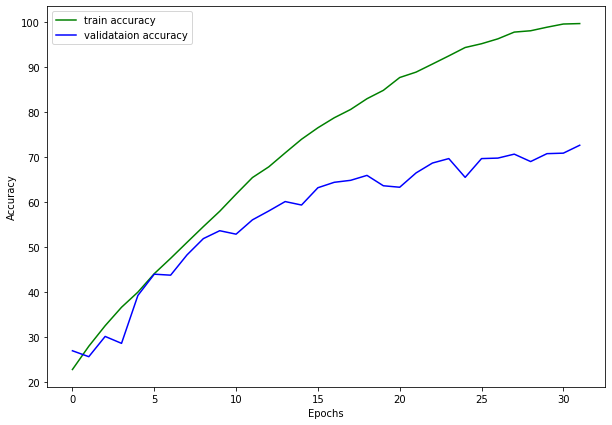

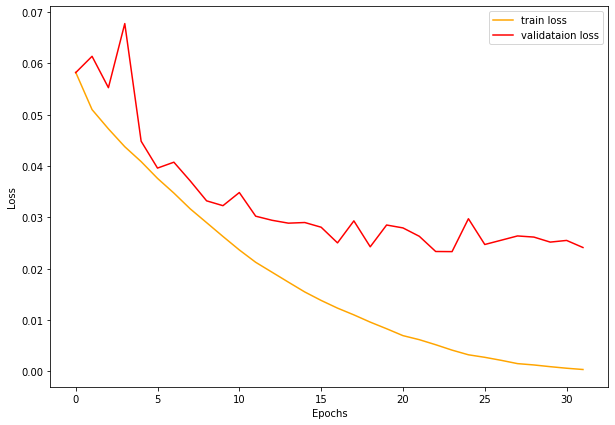

In [13]:
print('customized batchnorm test')
print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
model = resnet18(pretrained=False, norm_layer=CustomBatchNorm2d).to(device)
train(model, trainloader, valloader)
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

Training on 6073 examples, validating on 911 examples...
norm layer <class 'torch.nn.modules.batchnorm.BatchNorm2d'>
dilation [False, False, False]
stride 1
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)
Epoch 1 of 32
train loss 0.0579 val loss 0.0584 train acc 23.65 val acc 25.47 lr 0.0010
Epoch 2 of 32
train loss 0.0507 val loss 0.0552 train acc 29.10 val acc 26.02 lr 0.0010
Epoch 3 of 32
train loss 0.0465 val loss 0.0489 train acc 33.76 val acc 37.54 lr 0.0010
Epoch 4 of 32
train loss 0.0420 val loss 0.0459 train acc 39.32 val acc 38.75 lr 0.0010
Epoch 5 of 32
train loss 0.0384 val loss 0.0417 train acc 43.75 val acc 43.14 lr 0.0010
Epoch 6 of 32
train loss 0.0356 val loss 0.0420 train acc 46.62 val acc 

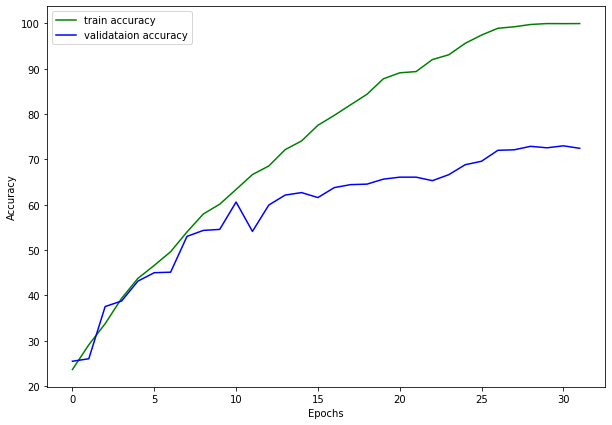

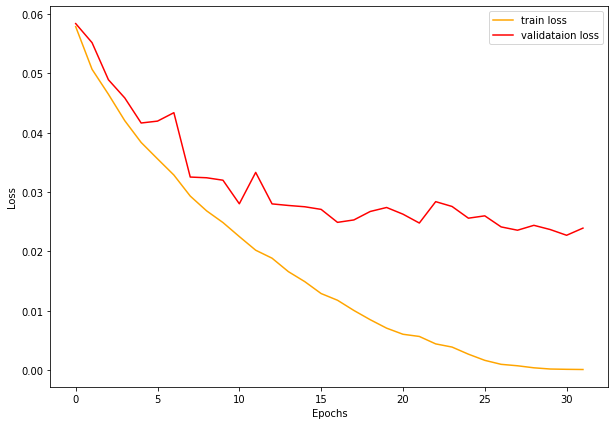

In [14]:
print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
model = resnet18(pretrained=False).to(device)
train(model, trainloader, valloader)
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))